# <center> **Home Credit Default Risk Assessment**
# <center> **Overview**

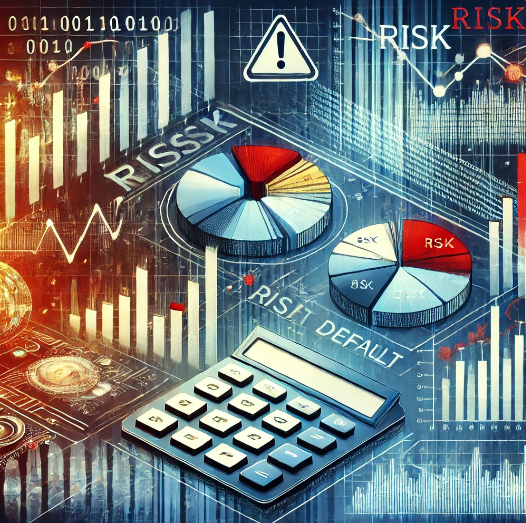

# **Introduction**

Risk management involves the identification, assessment, measurement, and management of potential risks. In the financial sector, investors take on risks with the expectation of receiving higher economic returns as compensation. This project will explore loan repayment rates as a key aspect of credit risk management. Specifically, we will examine the possibility of nonpayment, whether it pertains to future obligations or ongoing transactions.

# **Goals**

**Interpretability:**  Since this project is aimed at an industry where transparency is crucial, my goal is to make predictions with as few features as possible so they can be explained to both stakeholders and clients in an easy and clear manner.  </BR>
**Error Rate:** The cost of making an error can be very high. This is due to the large amounts of funds associated with each loan. We do not want the model to miss out on potential defaulters which could incur huge financial losses. My second goal is to precit defaulters with a ROC AUC score of 75% or higher.

# **Datasets**

**1. application_{train|test}:** This is the main table, broken into two files for Train (with TARGET) and Test(without TARGET).Static data for all applications. One row represents one loan in our datasample. </BR>
**2. bureau:** All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits theclient had in Credit Bureau before the application date. </BR>
**3. bureau_balance:** Monthly balances of previous credits in Credit Bureau. This table has one row for each month of history of every previous creditreported to Credit Bureau – i.e the table has (#loans in sample * # of relativeprevious credits * # of months where we have some history observable for theprevious credits) rows. </BR>
**4. POS_CASH_balance:** Monthly balance snapshots of previous POS (point of sales) and cash loans thatthe applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample –i.e. the table has (#loans in sample * # of relative previous credits * # ofmonths in which we have some history observable for the previous credits) rows.</BR>
**5. credit_card_balance:** Monthly balance snapshots of previous credit cards that the applicant has with Home Credit. This table has one row for each month of history of every previous credit inHome Credit (consumer credit and cash loans) related to loans in our sample –i.e. the table has (#loans in sample * # of relative previous credit cards * #of months where we have some history observable for the previous credit card)rows.</BR>
**6. previous_application:** All previous applications for Home Credit loans of clients who have loans in our sample. There is one row for each previous application related to loans in our datasample.</BR>
**7. installments_payments:** Repayment history for the previously disbursed credits in Home Credit related tothe loans in our sample. There is a) one row for every payment that was made plus b) one row each formissed payment. One row is equivalent to one payment of one installment OR one installmentcorresponding to one payment of one previous Home Credit credit related to loansin our sample.</BR>
**8. HomeCredit_columns_description:** This file contains descriptions for the columns in the various data files.

# **Technical Requirements**

1. Exploratory data analysis
2. Pre-Processing of the data
3. Application of various machine learning models to predict which clients will default on their loan.
4. Clear explanations of findings
5. Final conclusions
6. Suggestions on how the analysis can be improved

# **Standards**

> **Standard 1:** My standard for an acceptable ROC AUC is 75%. <BR>
> **Standard 2:** My standard for colinnearity is a Pearson correlation coefficient of approximately 80%. <BR>    

# **Biases**

There could be many hidden biases in the way the data is collected, which is not clear from the information provided. In addition, the large amount of missing data provides another level of bias.

# **Domain Knowledge**

I have no experience in the financial industry. I may have overlooked parts of the data that may have been most important and I may have given importance to parts that may have had little significance. 

# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings

import functions
import importlib
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Dell\\Documents\\AI\\Risk\\Risk\\functions.py'>

# **Display**

In [2]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('display.max_rows', 200)

# **Data**

## **Load Data**

In [3]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\application_train.csv",
    index_col=False
)

bureau = test = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\bureau.csv",
    index_col=False
)

balance = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\bureau_balance.csv",
    index_col=False
)

install = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\installments_payments.csv",
    index_col=False
)

previous = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\previous_application.csv",
    index_col=False
)

# **Application Train Table**

In [4]:
print('Train Set Shape:', train.shape)

Train Set Shape: (307511, 122)


In [5]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## **Data Types**

In [6]:
train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## **Numerical Features**

In [7]:
train.describe(include="number").map("{:,.2f}".format)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,"307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,499.00","307,233.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","104,582.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,509.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","134,133.00","306,851.00","246,546.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","159,080.00","306,490.00","306,490.00","306,490.00","306,490.00","307,510.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00"
mean,"278,180.52",0.08,0.42,"168,797.92","599,026.00","27,108.57","538,396.21",0.02,"-16,037.00","63,815.05","-4,986.12","-2,994.20",12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,"102,790.18",0.27,0.72,"237,123.15","402,490.78","14,493.74","369,446.46",0.01,"4,363.99","141,275

## **Categorical and Boolean Features**

In [8]:
functions.UniqueValues(train)

NAME_CONTRACT_TYPE: 2
CODE_GENDER: 3
FLAG_OWN_CAR: 2
FLAG_OWN_REALTY: 2
NAME_TYPE_SUITE: 7
NAME_INCOME_TYPE: 8
NAME_EDUCATION_TYPE: 5
NAME_FAMILY_STATUS: 6
NAME_HOUSING_TYPE: 6
OCCUPATION_TYPE: 18
WEEKDAY_APPR_PROCESS_START: 7
ORGANIZATION_TYPE: 58
FONDKAPREMONT_MODE: 4
HOUSETYPE_MODE: 3
WALLSMATERIAL_MODE: 7
EMERGENCYSTATE_MODE: 2


## **Column Types**

In [ ]:
train.dtypes.value_counts()

float64    59
int8       26
object     16
float32     5
float16     4
int32       1
Name: count, dtype: int64

## **Missing Values**

In [ ]:
functions.MissingValues(train)

## **Bureau Table**

In [10]:
print('Bureau Shape:', bureau.shape)

Bureau Shape: (1716428, 17)


In [11]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


## **Data Types**

In [12]:
bureau.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

## **Numerical Features**

In [13]:
bureau.describe(include="number").map("{:,.2f}".format)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,"1,716,428.00","1,716,428.00","1,716,428.00","1,716,428.00","1,610,875.00","1,082,775.00","591,940.00","1,716,428.00","1,716,415.00","1,458,759.00","1,124,648.00","1,716,428.00","1,716,428.00","489,637.00"
mean,"278,214.93","5,924,434.49","-1,142.11",0.82,510.52,"-1,017.44","3,825.42",0.01,"354,994.59","137,085.12","6,229.51",37.91,-593.75,"15,712.76"
std,"102,938.56","532,265.73",795.16,36.54,"4,994.22",714.01,"206,031.61",0.10,"1,149,811.34","677,401.13","45,032.03","5,937.65",720.75,"325,826.95"
min,"100,001.00","5,000,000.00","-2,922.00",0.00,"-42,060.00","-42,023.00",0.00,0.00,0.00,"-4,705,600.32","-586,406.11",0.00,"-41,947.00",0.00
25%,"188,866.75","5,463,953.75","-1,666.00",0.00,"-1,138.00","-1,489.00",0.00,0.00,"51,300.00",0.00,0.00,0.00,-908.00,0.00
50%,"278,055.00","5,926,303.50",-987.00,0.00,-330.00,-897.00,0.00,0.00,"125,518.50",0.00,0.00,0.00,-395.00,0.00
75%,"367,426.00","6,385,681.25",-474.00,0.00,474.00,-425.00,0.00,0.00,"315,000.00","40,153.50",0.00,0.00,-33.00,"13,500.00"
max,"456,255.00","6,843,457.00",0.00,"2,792.00","31,199.00",0.00,"115,987,185.00",9.00,"585,000,000.00","170,100,000.00","4,705,600.32","3,756,681.00",372.00,"118,453,423.50"


## **Categorical and Boolean Features**

In [14]:
functions.UniqueValues(bureau)

CREDIT_ACTIVE: 4
CREDIT_CURRENCY: 4
CREDIT_TYPE: 15


## **Column Types**

In [ ]:
bureau.dtypes.value_counts()

float64    59
int8       26
object     16
float32     5
float16     4
int32       1
Name: count, dtype: int64

## **Missing Values**

In [15]:
functions.MissingValues(bureau)

,NumberMissing,PercentageMissing,DataType
AMT_ANNUITY,1226791,71.47,float64
AMT_CREDIT_MAX_OVERDUE,1124488,65.51,float64
DAYS_ENDDATE_FACT,633653,36.92,float64
AMT_CREDIT_SUM_LIMIT,591780,34.48,float64
AMT_CREDIT_SUM_DEBT,257669,15.01,float64
DAYS_CREDIT_ENDDATE,105553,6.15,float64
AMT_CREDIT_SUM,13,0.00,float64


## **Bureau Balance Table**

In [16]:
print('Bureau-Balance Shape:', balance.shape)

Bureau-Balance Shape: (27299925, 3)


In [17]:
balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


## **Data Types**

In [18]:
balance.dtypes

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

## **Numerical Features**

In [19]:
balance.describe(include="number").map("{:,.2f}".format)

,SK_ID_BUREAU,MONTHS_BALANCE
count,"27,299,925.00","27,299,925.00"
mean,"6,036,297.33",-30.74
std,"492,348.86",23.86
min,"5,001,709.00",-96.00
25%,"5,730,933.00",-46.00
50%,"6,070,821.00",-25.00
75%,"6,431,951.00",-11.00
max,"6,842,888.00",0.00


## **Categorical and Boolean Features**

In [20]:
functions.UniqueValues(balance)

STATUS: 8


## **Column Types**

In [ ]:
balance.dtypes.value_counts()

float64    59
int8       26
object     16
float32     5
float16     4
int32       1
Name: count, dtype: int64

## **Missing Values**

In [21]:
functions.MissingValues(balance)

,NumberMissing,PercentageMissing,DataType


## **Installments Payments Table**

In [22]:
print('Installments Payments Shape:', install.shape)

Installments Payments Shape: (13605401, 8)


In [23]:
install.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## **Data Types**

In [24]:
install.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

## **Numerical Features**

In [25]:
install.describe(include="number").map("{:,.2f}".format)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,"13,605,401.00","13,605,401.00","13,605,401.00","13,605,401.00","13,605,401.00","13,602,496.00","13,605,401.00","13,602,496.00"
mean,"1,903,364.97","278,444.88",0.86,18.87,"-1,042.27","-1,051.11","17,050.91","17,238.22"
std,"536,202.91","102,718.31",1.04,26.66,800.95,800.59,"50,570.25","54,735.78"
min,"1,000,001.00","100,001.00",0.00,1.00,"-2,922.00","-4,921.00",0.00,0.00
25%,"1,434,191.00","189,639.00",0.00,4.00,"-1,654.00","-1,662.00","4,226.09","3,398.26"
50%,"1,896,520.00","278,685.00",1.00,8.00,-818.00,-827.00,"8,884.08","8,125.52"
75%,"2,369,094.00","367,530.00",1.00,19.00,-361.00,-370.00,"16,710.21","16,108.42"
max,"2,843,499.00","456,255.00",178.00,277.00,-1.00,-1.00,"3,771,487.85","3,771,487.85"


## **Categorical and Boolean Features**

In [26]:
functions.UniqueValues(install)

## **Column Types**

In [ ]:
install.dtypes.value_counts()

float64    59
int8       26
object     16
float32     5
float16     4
int32       1
Name: count, dtype: int64

## **Missing Values**

In [27]:
functions.MissingValues(install)

,NumberMissing,PercentageMissing,DataType
DAYS_ENTRY_PAYMENT,2905,0.02,float64
AMT_PAYMENT,2905,0.02,float64


## **Previous Applications Table**

In [28]:
print('Previous Applications Shape:', previous.shape)

Previous Applications Shape: (1670214, 37)


In [29]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Types**

In [30]:
previous.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

## **Numerical Features**

In [31]:
previous.describe(include="number").map("{:,.2f}".format)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,"1,670,214.00","1,670,214.00","1,297,979.00","1,670,214.00","1,670,213.00","774,370.00","1,284,699.00","1,670,214.00","1,670,214.00","774,370.00","5,951.00","5,951.00","1,670,214.00","1,670,214.00","1,297,984.00","997,149.00","997,149.00","997,149.00","997,149.00","997,149.00","997,149.00"
mean,"1,923,089.14","278,357.17","15,955.12","175,233.86","196,114.02","6,697.40","227,847.28",12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,"342,209.86","13,826.27","33,767.77","76,582.40","81,992.34",0.33
std,"532,597.96","102,814.82","14,782.14","292,779.76","318,574.62","20,921.50","315,396.56",3.33,0.06,0.11,0.09,0.10,779.10,"7,127.44",14.57,"88,916.12","72,444.87","106,857.03","149,647.42","153,303.52",0.47
min,"1,000,001.00","100,001.00",0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,"-2,922.00",-1.00,0.00,"-2,922.00","-2,892.00","-2,801.00","-2,889.00","-2,874.00",0.00
25%,"1,461,857.25","189,329.00","6,321.78","18,720.00","24,160.50",0.00,"50,841.00",10.00,1.00,0.00,0.16,0.72,"-1,300.00",-1.00,6.00,"365,243.00","-1,628.00","-1,242.00","-1,314.00","-1,270.00",0.00
50%,"1,923,110.50","278,714.50","11,250.00","71,046.00","80,541.00","1,638.00","112,320.00",12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,"365,243.00",-831.00,-361.00,-537.00,-499.00,0.00
75%,"2,384,279.75","367,514.00","20,658.42","180,360.00","216,418.50","7,740.00","234,000.00",15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,"365,243.00",-411.00,129.00,-74.00,-44.00,1.00
max,"2,845,382.00","456,255.00","418,058.15","6,905,160.00","6,905,160.00","3,060,045.00","6,905,160.00",23.00,1.00,1.00,1.00,1.00,-1.00,"4,000,000.00",84.00,"365,243.00","365,243.00","365,243.00","365,243.00","365,243.00",1.00


## **Categorical and Boolean Features**

In [32]:
functions.UniqueValues(previous)

NAME_CONTRACT_TYPE: 4
WEEKDAY_APPR_PROCESS_START: 7
FLAG_LAST_APPL_PER_CONTRACT: 2
NAME_CASH_LOAN_PURPOSE: 25
NAME_CONTRACT_STATUS: 4
NAME_PAYMENT_TYPE: 4
CODE_REJECT_REASON: 9
NAME_TYPE_SUITE: 7
NAME_CLIENT_TYPE: 4
NAME_GOODS_CATEGORY: 28
NAME_PORTFOLIO: 5
NAME_PRODUCT_TYPE: 3
CHANNEL_TYPE: 8
NAME_SELLER_INDUSTRY: 11
NAME_YIELD_GROUP: 5
PRODUCT_COMBINATION: 17


## **Column Types**

In [ ]:
previous.dtypes.value_counts()

float64    59
int8       26
object     16
float32     5
float16     4
int32       1
Name: count, dtype: int64

## **Missing Values**

In [33]:
functions.MissingValues(previous)

,NumberMissing,PercentageMissing,DataType
RATE_INTEREST_PRIVILEGED,1664263,99.64,float64
RATE_INTEREST_PRIMARY,1664263,99.64,float64
AMT_DOWN_PAYMENT,895844,53.64,float64
RATE_DOWN_PAYMENT,895844,53.64,float64
NAME_TYPE_SUITE,820405,49.12,object
DAYS_LAST_DUE,673065,40.30,float64
DAYS_FIRST_DRAWING,673065,40.30,float64
DAYS_FIRST_DUE,673065,40.30,float64
DAYS_TERMINATION,673065,40.30,float64
NFLAG_INSURED_ON_APPROVAL,673065,40.30,float64


# **Summary**

> * **Main Table (application_train)** — There are approximately 300,000 rows and 122 columns in this table. The final column is "TARGET," which indicates if the client defaulted on a loan. 
> * **Supplementary Tables** — I chose four supplementary tables for this project. I displayed the basic characteristics of each of these tables above.
> * **Missing Data** — There are variouis percentages of missing values in many of the columns. Some of the tables contain a large amount of missing data that I dealt with in later parts of this project.